# Diplomado Ciencia de Datos
## Procesamiento de Lenguaje Natural
### Análisis de Sentimiento en la Red Social Twitter

#### 2. Análisis en Tiempo Real con la interfase Inference de Hugging Face

Referencia: https://huggingface.co/docs/api-inference/index

In [1]:
# Gestión de autenticación para la API de Twitter

import tweepy

# Se registran credenciales

consumer_key = ""
consumer_secret = ""

# Se realiza la autenticación en Twitter

auth = tweepy.AppAuthHandler(consumer_key, consumer_secret)

# Se crea una cubierta para la API de Twitter
# Se utiliza Tweepy, un paquete Python de código abierto que soporta la API de Twitter

api = tweepy.API(auth, wait_on_rate_limit=True)

In [2]:
# Recopilación de tweets

# Se define el término de búsqueda

query = '@obsdmd'
query = query + ' -filter:retweets'

# Se define el número de tweets a recuperar 

tweet_count = 100
tweet_limit = 2500

# Se realiza la búsqueda utilizando el paquete Tweepy

search = tweepy.Cursor(api.search_tweets,
                       q = query,
                       tweet_mode = 'extended',
                       count = tweet_count,
                       lang='en').items(tweet_limit)

# Se procesan los resultados

tweets = []

for result in search:
    tweet_content = result.full_text
    
    # Se utiliza únicamente el texto del tweet 
    tweets.append(tweet_content)

In [3]:
# Se despliega una muestra de tweets

tweets[0:5]

['@Artifexx @obsdmd @readwiseio save thread, please',
 '@xamde @cristianvasquez @logseq @obsdmd @NotionHQ Our approach has been to hide the technical details of RDF (URIs, syntax) as nuch as possible\nhttps://t.co/YdXP2Fao8L',
 '@zsviczian Thanks for bring Visual Thinking to my PKM based on @obsdmd.  Good templates reduce the friction. https://t.co/d8Cho38XdY',
 "@shoppingtheatre @logseq @obsdmd This is true. I'm thinking logseq for atomic notes and obsidian for long form writing. I already use Notion for planning.",
 '@kepano @obsdmd Great, I wanted to create my own theme few days ago. Waiting for it!👌']

In [4]:
# Configuración de análisis de sentimiento

import requests
import time

# Se configura la llamada a la interfase de programación Inference

model = "cardiffnlp/twitter-roberta-base-sentiment-latest"
hf_token = ""
API_URL = "https://api-inference.huggingface.co/models/" + model
headers = {"Authorization": "Bearer %s" % (hf_token)}

# Se define una función que recupera el resultado del análisis

def analysis(data):
    payload = dict(inputs=data, options=dict(wait_for_model=True))
    response = requests.post(API_URL, headers=headers, json=payload)
    print(response)
    return response.json()

In [5]:
# Ejecución de análisis de sentimiento en cada tweet

tweets_analysis = []
for tweet in tweets:
    try:
        sentiment_result = analysis(tweet)[0]
        
        # Se recupera el sentimiento con el score mas alto     
        top_sentiment = max(sentiment_result, key=lambda x: x['score']) 
        
        tweets_analysis.append({'tweet': tweet, 'sentiment': top_sentiment['label']})

    except Exception as e: 
        print(e)

<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200

In [6]:
# Exploración de resultados de análisis

import pandas as pd

# Se cargan datos a dataframe

pd.set_option('max_colwidth', None)
pd.set_option('display.width', 3000) 
df = pd.DataFrame(tweets_analysis)

# Se muestra un tweet de cada sentimiento

display(df[df["sentiment"] == 'positive'].head(1))
display(df[df["sentiment"] == 'neutral'].head(1))
display(df[df["sentiment"] == 'negative'].head(1))

,tweet,sentiment
2,@zsviczian Thanks for bring Visual Thinking to my PKM based on @obsdmd. Good templates reduce the friction. https://t.co/d8Cho38XdY,positive


,tweet,sentiment
0,"@Artifexx @obsdmd @readwiseio save thread, please",neutral


,tweet,sentiment
5,@kepano @obsdmd Yes it is!\nIt's quite a mess now. \nBut will distil it tonsimethibg better in the future \n\nhttps://t.co/7zyjiipFkm,negative


sentiment
negative     23
neutral     128
positive    135
dtype: int64


<AxesSubplot:>

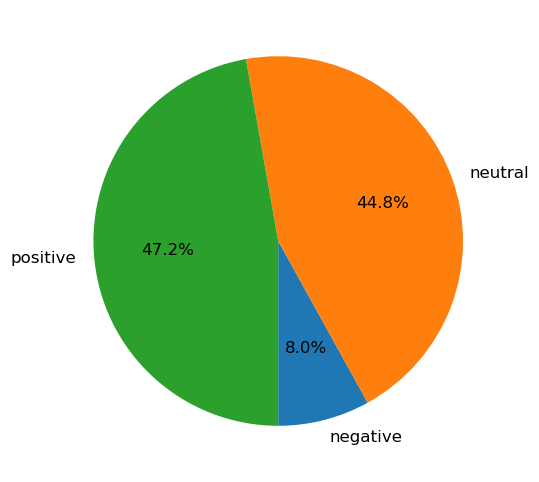

In [7]:
# Visualización de tweets por sentimiento

import matplotlib.pyplot as plt

# Se cuenta el número de tweets por sentimiento

sentiment_counts = df.groupby(['sentiment']).size()
print(sentiment_counts)

# Se muestra un resumen para visualización

fig = plt.figure(figsize=(6,6), dpi=100)
ax = plt.subplot(111)
sentiment_counts.plot.pie(ax=ax, autopct='%1.1f%%', startangle=270, fontsize=12, label="")

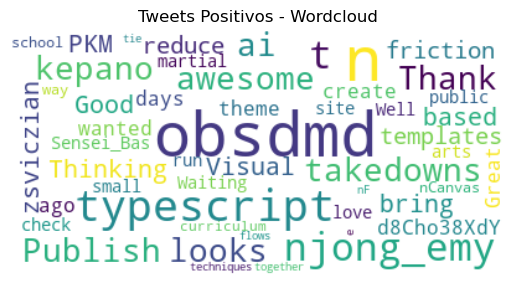

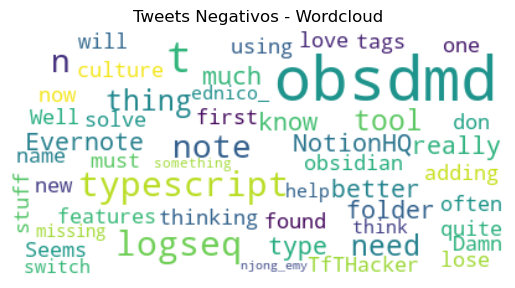

In [8]:
# Elaboración de nube de palabras de tweets recopilados

from wordcloud import WordCloud
from wordcloud import STOPWORDS

# Se elabora una nube de palabras con sentimiento positivo

positive_tweets = df['tweet'][df["sentiment"] == 'positive']
stop_words = ["https", "co", "user", "RT"] + list(STOPWORDS)
positive_wordcloud = WordCloud(max_font_size=50, max_words=50, background_color="white", stopwords = stop_words).generate(str(positive_tweets))
plt.figure()
plt.title("Tweets Positivos - Wordcloud")
plt.imshow(positive_wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

# Se elabora una nube de palabras con sentimiento negativo

negative_tweets = df['tweet'][df["sentiment"] == 'negative']
stop_words = ["https", "co", "user", "RT"] + list(STOPWORDS)
negative_wordcloud = WordCloud(max_font_size=50, max_words=50, background_color="white", stopwords = stop_words).generate(str(negative_tweets))
plt.figure()
plt.title("Tweets Negativos - Wordcloud")
plt.imshow(negative_wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

##### Este análisis en tiempo real está basado en un tutorial publicado en el blog de Huggingface por Federico Pascual, el 7 de Julio de 2022.

###### Twitter: @FedericoPascual GitHub: feconroses

https://huggingface.co/blog/sentiment-analysis-twitter